In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
xRange = np.linspace(-2, 2, 1000)
yRange = np.linspace(-2, 2, 1000)

X, Y = np.meshgrid(xRange, yRange)

In [27]:
targetPos = np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)])

In [28]:
obsRadius = 0.1
nObstacles = 3

obsPositions = []

for obs in range(nObstacles):
    obsPos = np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
    obsPositions.append(obsPos)

In [32]:
def computeReward(x, y):

    pos = np.array([x, y])
    dist_to_target = np.linalg.norm(targetPos - pos)**2
    if dist_to_target <= 0.001:
        positionReward = 1000
    else:
        positionReward = -0.8*dist_to_target if dist_to_target > 0.5 else 1/dist_to_target

    positionReward = np.log(positionReward) if positionReward > 0 else positionReward

    obstacleProximityPenalty = 0
    minDistToObs = np.inf

    for obsPos in obsPositions:
        offset = obsPos - pos
        # offsetMag = np.linalg.norm(offset)
        # distToObstacle = offsetMag - obsRadius
        distToObstacle = np.linalg.norm(offset)
        
        if distToObstacle < minDistToObs:    
            minDistToObs = distToObstacle
            distToObstacleSq = distToObstacle**2
            if distToObstacleSq <= 0.001:
                obstacleProximityPenalty = -1000
            else:
                obstacleProximityPenalty = -1/(distToObstacleSq)
        

    return positionReward + obstacleProximityPenalty
    # return positionReward 

In [33]:
R = [[0]*1000]*1000
R = np.array(R)

for i in range(1000):
    for j in range(1000):
        R[i][j] = computeReward(X[i][j], Y[i][j])

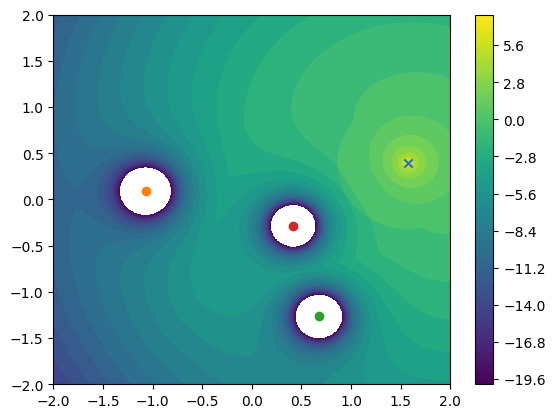

In [34]:
levels = np.arange(-20, 8, 0.1)
cs = plt.contourf(X, Y, R, levels)
plt.scatter(targetPos[0], targetPos[1], marker='x')
for obs in obsPositions:
    plt.scatter(obs[0], obs[1], marker='o')
plt.colorbar(cs)